In [1]:
import sys
!{sys.executable} -m pip install statsbombpy
from statsbombpy import sb


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [129]:
comps = sb.competitions()
comps[comps["competition_name"]=="Premier League"]
comps.sort_values(by="season_name",ascending=False).head(10)
comp_match_counts = {}
for _, row in comps.sort_values(by="season_name",ascending=False).head(20).iterrows():
    matches = sb.matches(row["competition_id"], row["season_id"])
    comp_match_counts[f"{row['competition_name']} ({row['season_name']})"] = len(matches)
comp_match_counts 


{'Copa America (2024)': 32,
 'UEFA Euro (2024)': 51,
 '1. Bundesliga (2023/2024)': 34,
 'African Cup of Nations (2023)': 52,
 "Women's World Cup (2023)": 64,
 'Major League Soccer (2023)': 6,
 'Ligue 1 (2022/2023)': 32,
 "UEFA Women's Euro (2022)": 31,
 'FIFA World Cup (2022)': 64,
 'Ligue 1 (2021/2022)': 26,
 'Indian Super league (2021/2022)': 115,
 "FA Women's Super League (2020/2021)": 131,
 'La Liga (2020/2021)': 35,
 'UEFA Euro (2020)': 51,
 'La Liga (2019/2020)': 33,
 "FA Women's Super League (2019/2020)": 87,
 "Women's World Cup (2019)": 52,
 'Champions League (2018/2019)': 1,
 'La Liga (2018/2019)': 34,
 "FA Women's Super League (2018/2019)": 108}

In [130]:
comps[comps["competition_name"]=="Premier League"]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
64,2,27,England,Premier League,male,False,False,2015/2016,2024-06-12T07:43:56.243851,2021-06-13T16:17:31.694,None,2024-06-12T07:43:56.243851
65,2,44,England,Premier League,male,False,False,2003/2004,2024-03-08T14:49:13.195793,2021-06-13T16:17:31.694,None,2024-03-08T14:49:13.195793


In [132]:
print("Amount of Games: ",sb.matches(2,27).shape[0])
sb.matches(2,27).head()

Amount of Games:  380


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2


In [4]:
ordered_events =  sb.events(3754058).sort_values(by=["period","timestamp"],ascending=[True,True])

c:\Users\zcoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [5]:
passes = sb.events(3754058,split=True)["passes"]

c:\Users\zcoch\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [6]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import numpy as np
import pandas as pd

In [7]:
passes.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'pass_recipient', 'pass_length', 'pass_angle', 'pass_height',
       'pass_end_location', 'pass_type', 'pass_body_part',
       'possession_team_id', 'team_id', 'player_id', 'pass_recipient_id',
       'pass_switch', 'under_pressure', 'pass_outcome', 'pass_aerial_won',
       'pass_assisted_shot_id', 'pass_shot_assist', 'off_camera', 'pass_cross',
       'pass_cut_back', 'counterpress', 'pass_technique', 'pass_through_ball',
       'pass_deflected', 'pass_inswinging', 'pass_outswinging', 'out'],
      dtype='object')

In [8]:
passes[["location","pass_end_location","pass_outcome"]]["pass_outcome"].value_counts()

pass_outcome
Incomplete          202
Out                  27
Injury Clearance      2
Pass Offside          2
Unknown               1
Name: count, dtype: int64

In [9]:
passes[~passes["pass_outcome"].isin({"Incomplete","Out","Injury Clearance","Pass Offside","Unknown"})].shape[0]/passes.shape[0]

0.7664670658682635

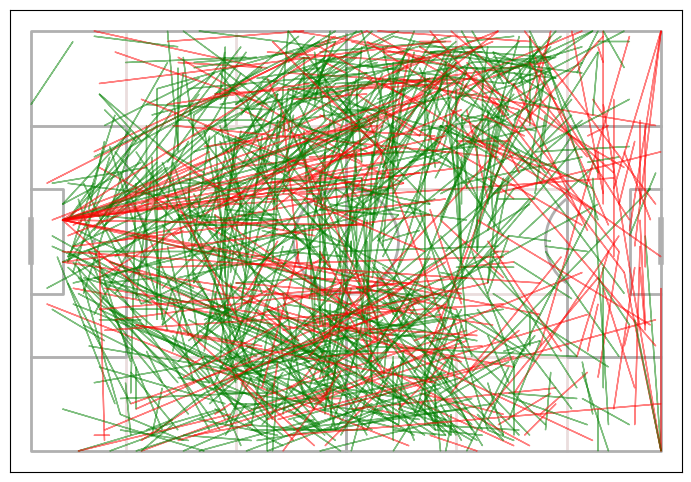

In [ ]:
# pitch = Pitch(positional=True, axis=True)
# fig, ax = plt.subplots(figsize = (10,6))
# pitch.draw(ax=ax)
# for i in range(passes.shape[0]):
#     row = passes.iloc[i]
#     if row["pass_outcome"] not in {"Incomplete","Out","Injury Clearance","Pass Offside","Unknown"}:
#         color = 'g'
#     else:
#         color = 'r'
#     plt.arrow(int(row["location"][0]),int(row["location"][1]),int(row["pass_end_location"][0]-row["location"][0]),int(row["pass_end_location"][1]-row["location"][1]),color=color,alpha=.5)

In [19]:
# for possesion in passes["possession"].unique():
#     passes_poss = passes[passes["possession"]==possesion]
#     team = passes_poss["possession_team"].unique()[0]
#     pitch = Pitch(positional=True, axis=True)
#     fig, ax = plt.subplots(figsize = (10,6))
#     pitch.draw(ax=ax)
#     passes_poss = passes_poss.sort_values(by=["timestamp"],ascending=True)
#     for i in range(passes_poss.shape[0]):
#         row = passes_poss.iloc[i]
#         if row["pass_outcome"] not in {"Incomplete","Out","Injury Clearance","Pass Offside","Unknown"}:
#             color = 'g'
#         else:
#             color = 'r'
#         plt.arrow(int(row["location"][0]),int(row["location"][1]),int(row["pass_end_location"][0]-row["location"][0]),int(row["pass_end_location"][1]-row["location"][1]),color=color,alpha=.5,width=.1*i)
#     plt.title(f"{team} Possession")
#     plt.show()

In [79]:
ordered_events = ordered_events[~ordered_events["location"].isna()]

TypeError: 'float' object is not iterable

In [21]:
ordered_events.columns


Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type',
       'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflecte

In [82]:
ordered_events["type"].value_counts()

type
Pass              1002
Ball Receipt*      924
Carry              742
Pressure           363
Ball Recovery      102
Duel                83
Clearance           59
Block               42
Goal Keeper         35
Miscontrol          34
Dribble             31
Dispossessed        29
Shot                27
Interception        25
Dribbled Past       19
Foul Committed      19
Foul Won            18
Shield               1
Name: count, dtype: int64

In [98]:
ordered_events.loc[ordered_events["possession"] == 4, [
    "type", "location", "pass_end_location", "pass_outcome",
    "carry_end_location",  "duel_type", "duel_outcome","team"
]].head(50)

,type,location,pass_end_location,pass_outcome,carry_end_location,duel_type,duel_outcome,team
24,Pass,"[36.8, 21.3]","[42.6, 36.5]",NaN,NaN,NaN,NaN,AFC Bournemouth
1025,Ball Receipt*,"[42.6, 36.5]",NaN,NaN,NaN,NaN,NaN,AFC Bournemouth
25,Pass,"[43.9, 36.5]","[28.3, 35.0]",NaN,NaN,NaN,NaN,AFC Bournemouth
2679,Pressure,"[77.7, 49.6]",NaN,NaN,NaN,NaN,NaN,Leicester City
26,Pass,"[28.1, 35.0]","[36.4, 43.2]",NaN,NaN,NaN,NaN,AFC Bournemouth
1026,Ball Receipt*,"[28.3, 35.0]",NaN,NaN,NaN,NaN,NaN,AFC Bournemouth
1027,Ball Receipt*,"[36.4, 43.2]",NaN,NaN,NaN,NaN,NaN,AFC Bournemouth
1946,Carry,"[36.4, 43.2]",NaN,NaN,"[35.1, 41.9]",NaN,NaN,AFC Bournemouth
2680,Pressure,"[83.7, 34.4]",NaN,NaN,NaN,NaN,NaN,Leicester City
27,Pass,"[35.1, 41.9]","[27.4, 50.4]",NaN,NaN,NaN,NaN,AFC Bournemouth


In [47]:
ordered_events[ordered_events["type"]=="Foul Committed"].iloc[0].to_dict()

{'ball_receipt_outcome': nan,
 'ball_recovery_recovery_failure': nan,
 'carry_end_location': nan,
 'clearance_aerial_won': nan,
 'clearance_body_part': nan,
 'clearance_head': nan,
 'clearance_left_foot': nan,
 'clearance_right_foot': nan,
 'counterpress': nan,
 'dribble_nutmeg': nan,
 'dribble_outcome': nan,
 'dribble_overrun': nan,
 'duel_outcome': nan,
 'duel_type': nan,
 'duration': 0.0,
 'foul_committed_advantage': True,
 'foul_committed_card': nan,
 'foul_committed_offensive': nan,
 'foul_committed_penalty': nan,
 'foul_committed_type': nan,
 'foul_won_advantage': nan,
 'foul_won_defensive': nan,
 'foul_won_penalty': nan,
 'goalkeeper_body_part': nan,
 'goalkeeper_end_location': nan,
 'goalkeeper_outcome': nan,
 'goalkeeper_position': nan,
 'goalkeeper_punched_out': nan,
 'goalkeeper_technique': nan,
 'goalkeeper_type': nan,
 'id': 'd3628ab0-f089-41a5-bbeb-3c00887594d5',
 'index': 304,
 'interception_outcome': nan,
 'location': [97.8, 3.4],
 'match_id': 3754058,
 'minute': 5,
 'm

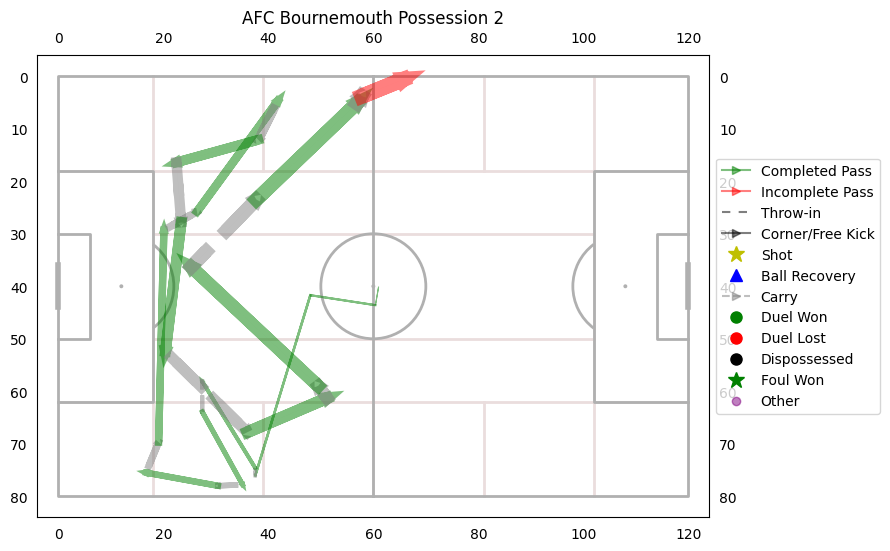

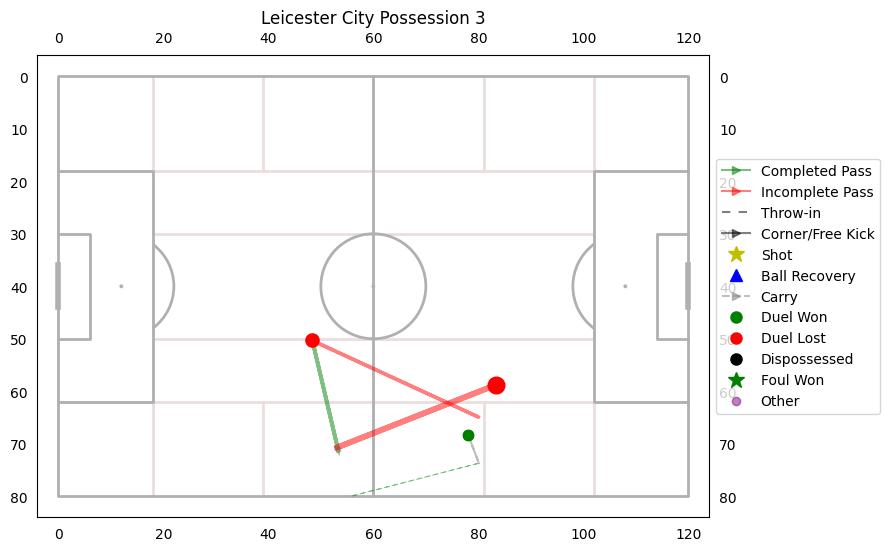

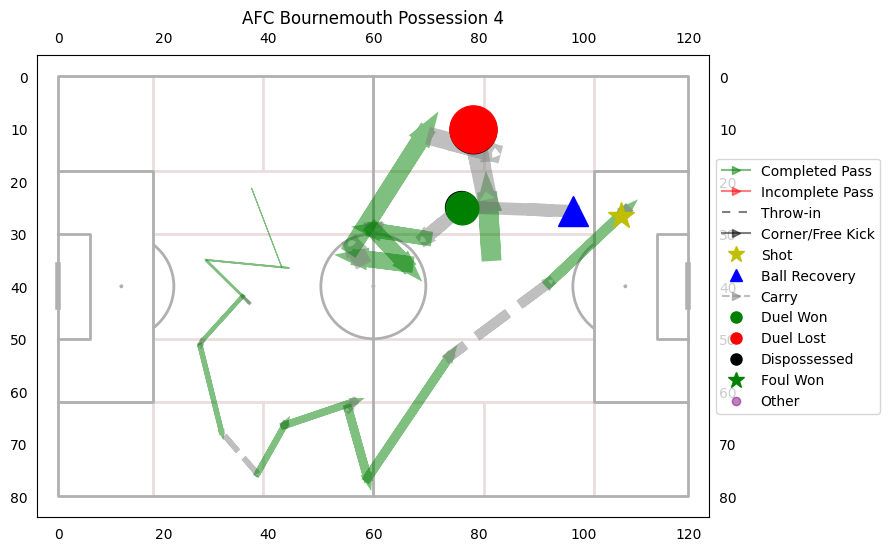

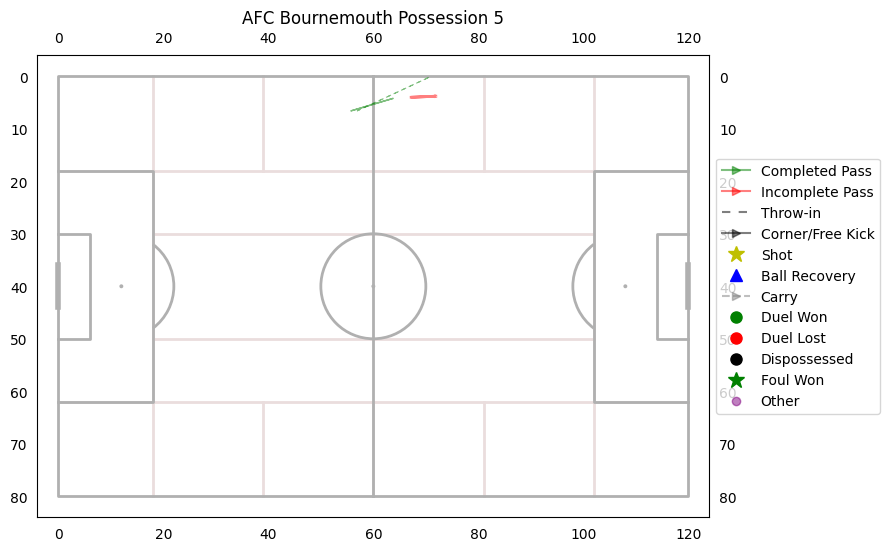

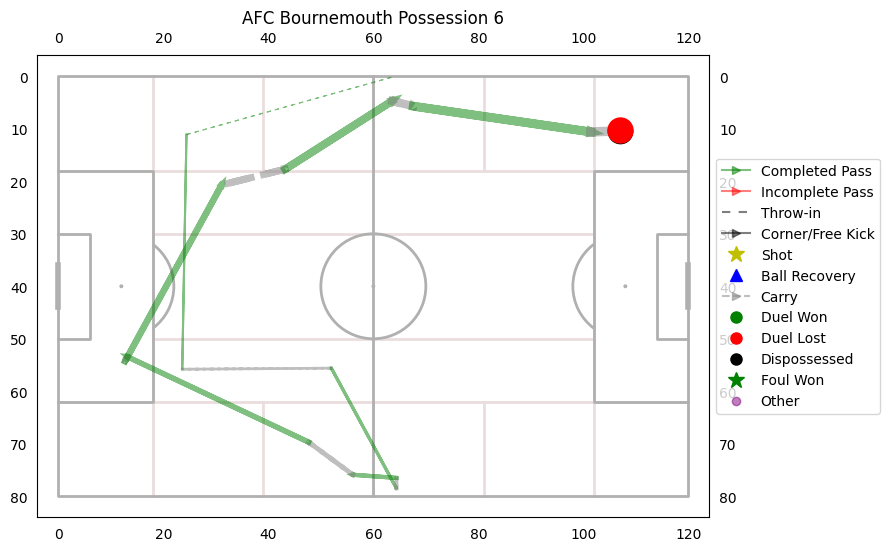

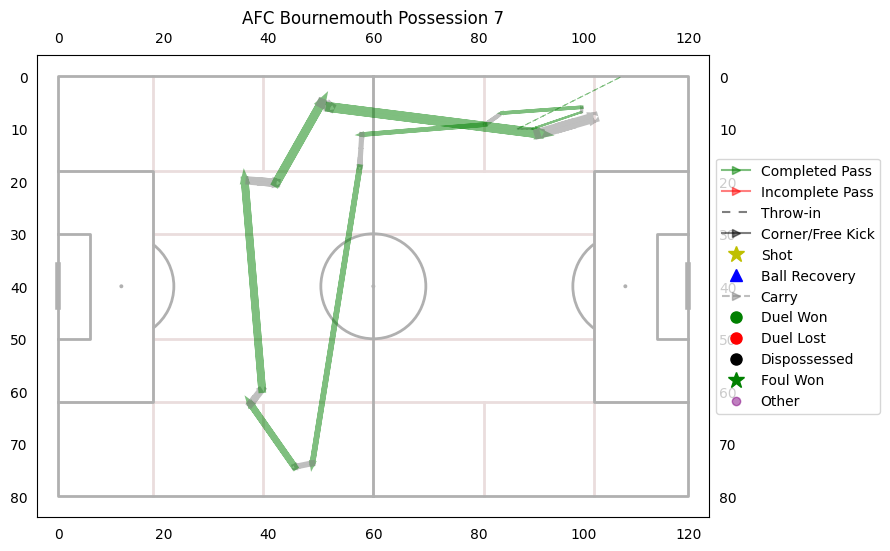

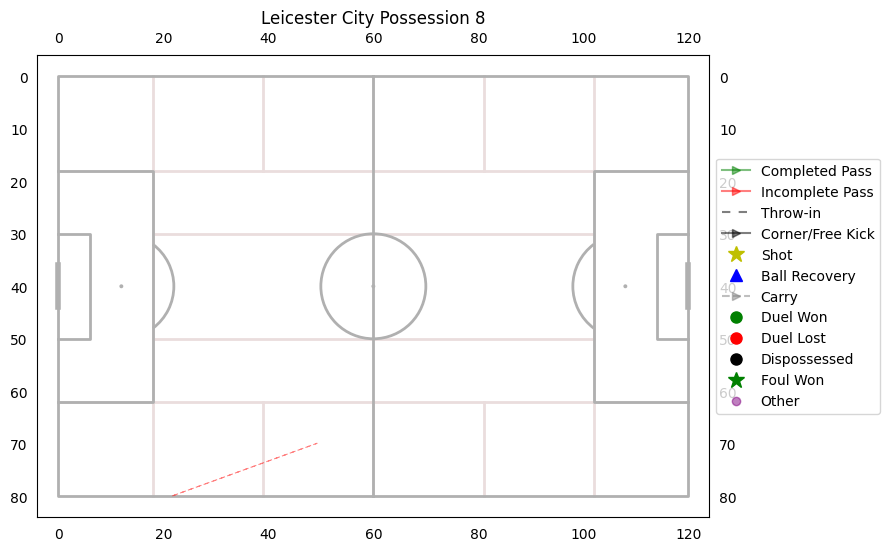

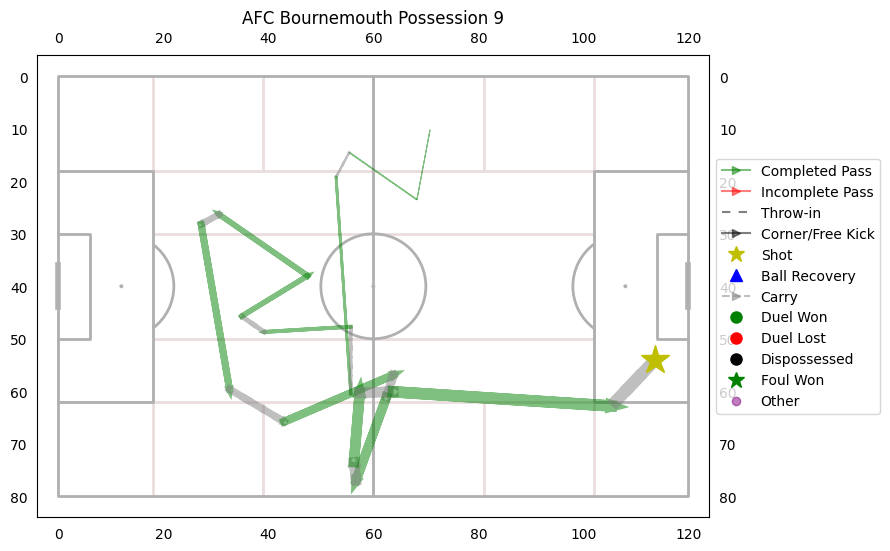

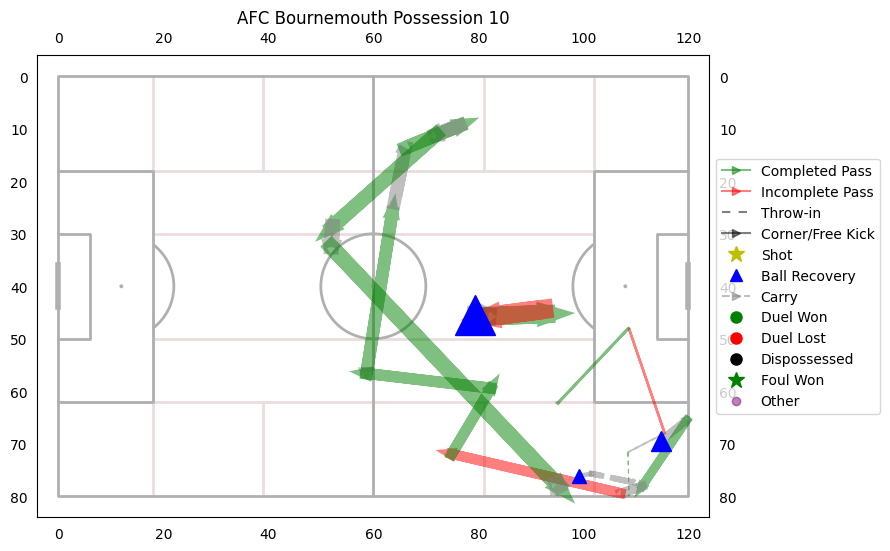

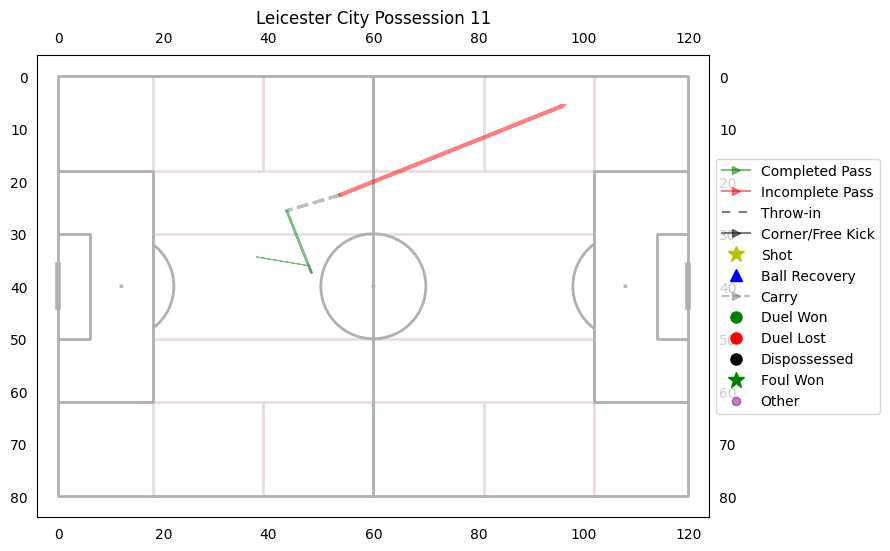

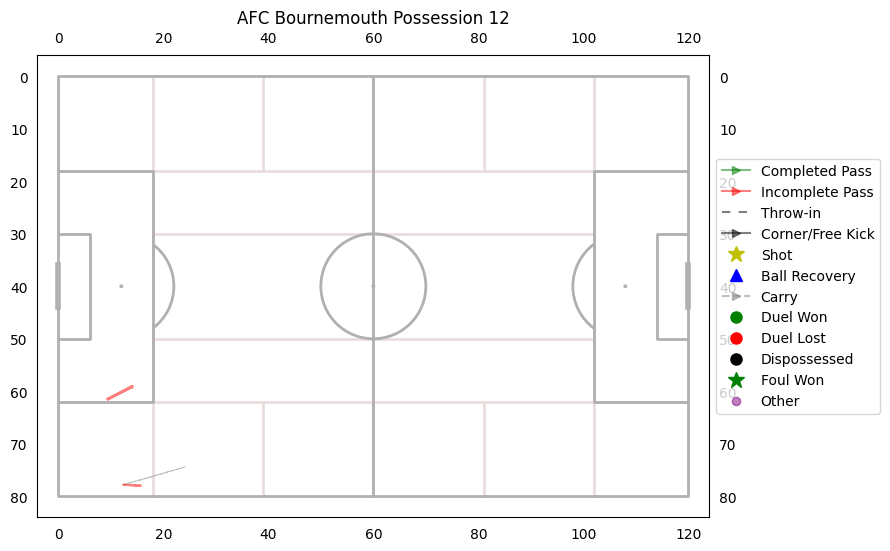

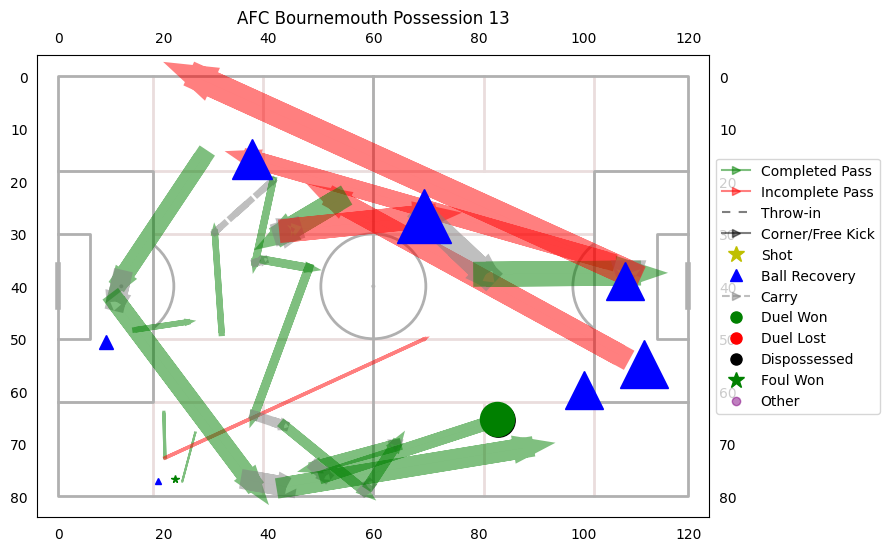

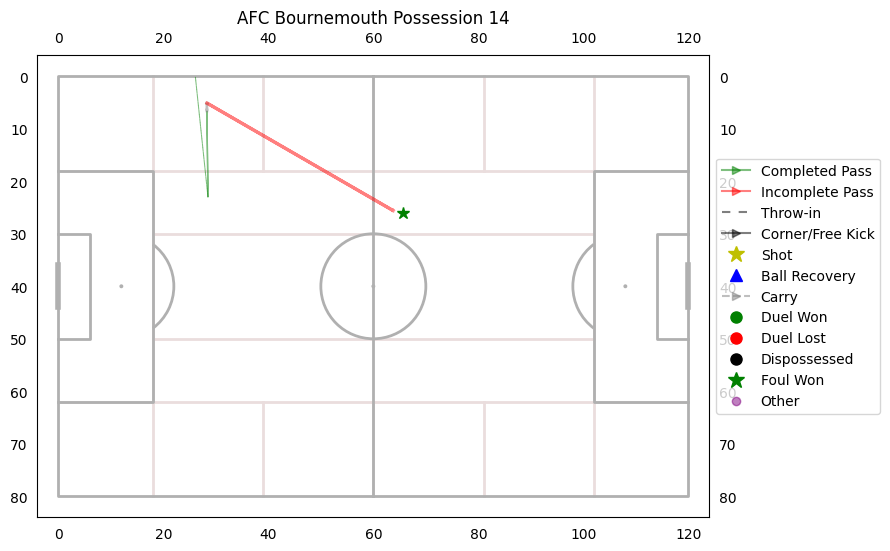

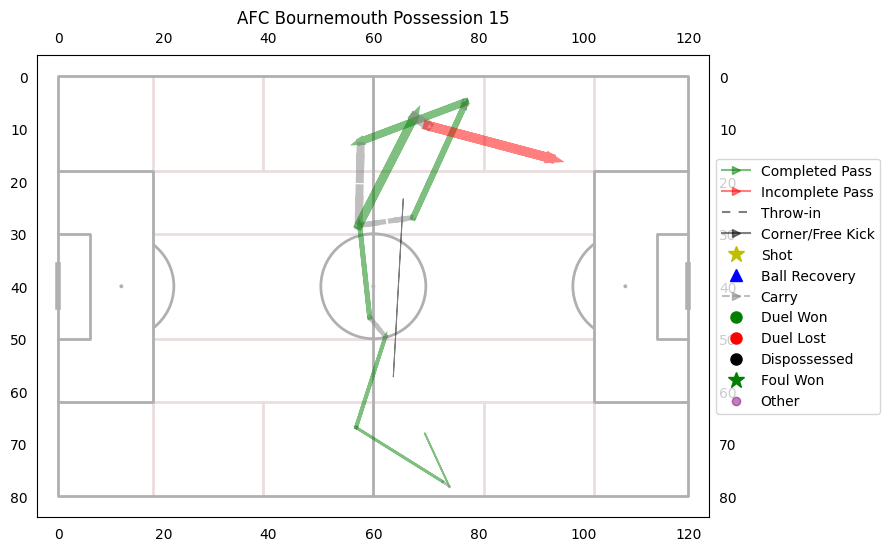

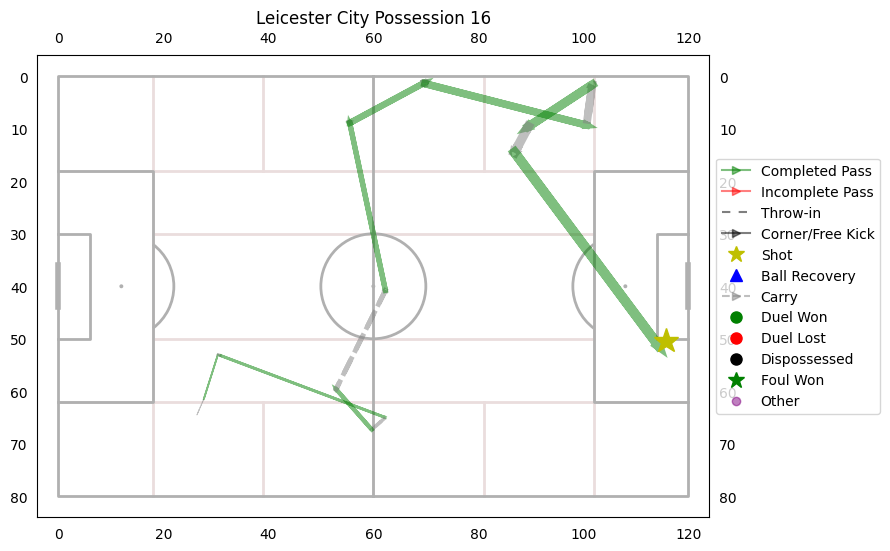

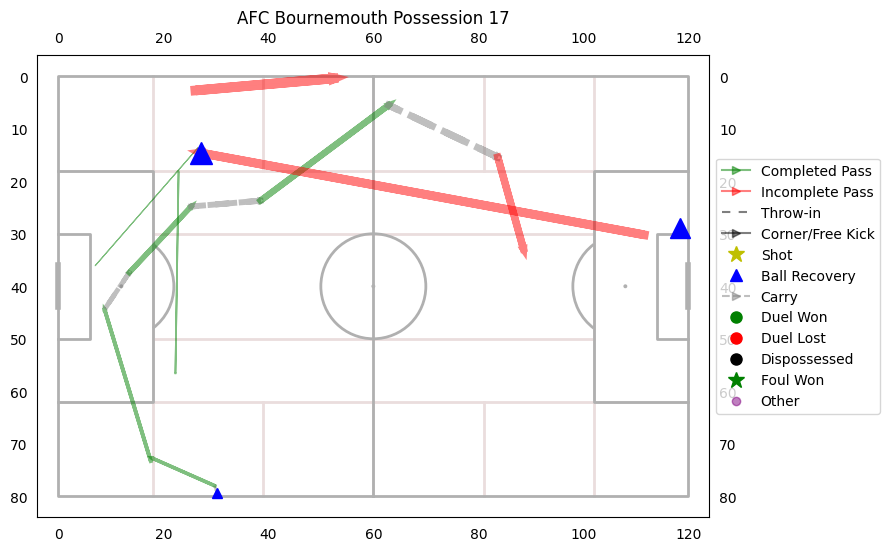

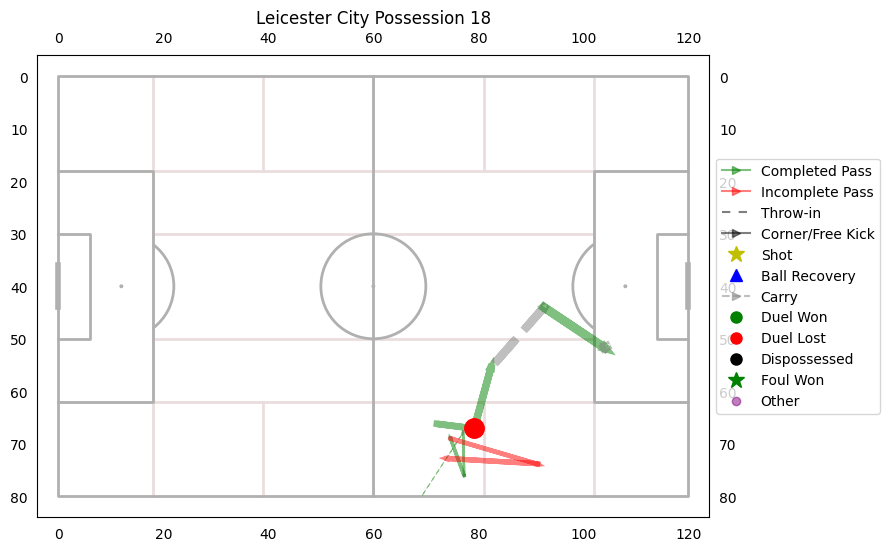

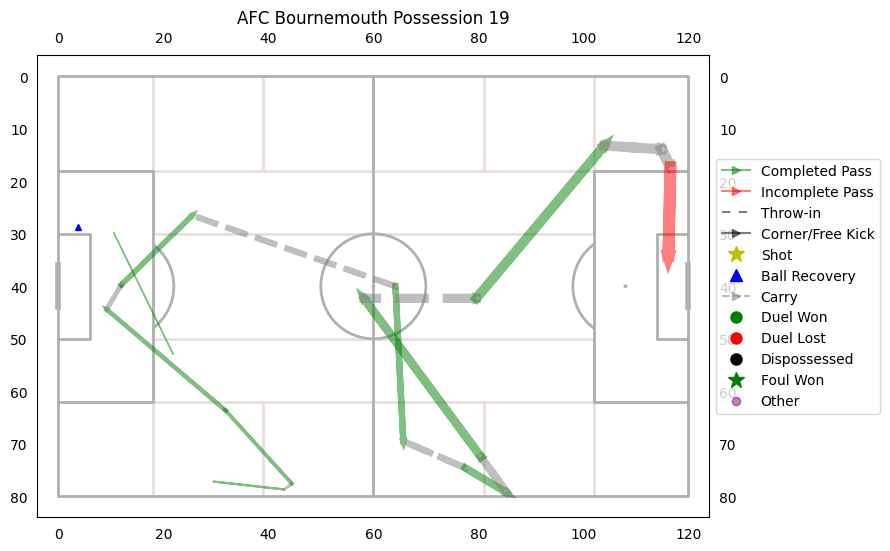

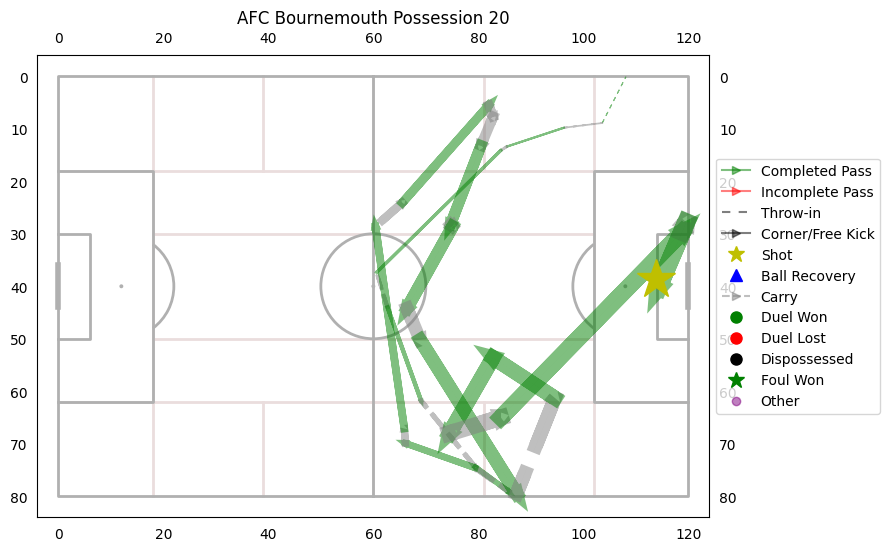

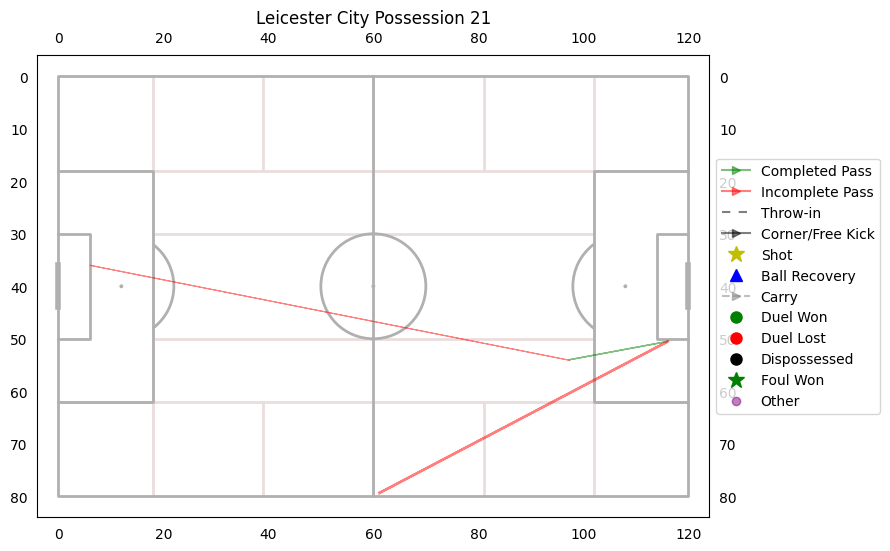

In [124]:
ordered_events["type"].value_counts()
# Create a figure for each possession showing the sequence of events
for possession in ordered_events["possession"].unique()[:20]:
    # Get events for this possession
    possession_events = ordered_events[ordered_events["possession"]==possession]
    team = possession_events["possession_team"].unique()[0]
    
    # Create pitch visualization
    pitch = Pitch(positional=True, axis=True,label=True)
    fig, ax = plt.subplots(figsize=(10,6))
    pitch.draw(ax=ax)
    
    # Sort events by timestamp
    possession_events = possession_events.sort_values(by=["timestamp"],ascending=True)
    j=1
    # Plot each event
    for i, event in possession_events.iterrows():
        # Get event location
        x, y = event["location"]
        event_team = event["team"]
        if event_team!=team:
            x=120-x
            y=80-y
        # Different colors/markers for different event types
        if event["type"] == "Pass":
            if "pass_end_location" in event and isinstance(event["pass_end_location"], list):
                end_x, end_y = event["pass_end_location"]
                if event_team!=team:
                    end_x=120-end_x
                    end_y=80-end_y
                # Green for completed passes, red for incomplete
                color = 'g' if event.get("pass_outcome") not in {"Incomplete","Out","Injury Clearance","Pass Offside","Unknown"} else 'r'
                linestyle = '-'
                if event["pass_type"]=="Throw-in":
                    linestyle = (0,(4,4,4,4))
                if event["pass_type"]=="Corner":
                    color = 'k'
                if event["pass_type"]=="Free Kick":
                    color = 'k'
                plt.arrow(x, y, end_x-x, end_y-y, color=color, alpha=0.5, linewidth=.5+1*j/4, ls=linestyle)
        elif event["type"] == "Shot":
            plt.plot(x, y, 'y*', markersize=4+j/2)
        elif event["type"] == "Ball Recovery":
            plt.plot(x, y, 'b^', markersize=4+j/2)
        elif event["type"] == "Carry":
            if "carry_end_location" in event and isinstance(event["carry_end_location"], list):
                end_x, end_y = event["carry_end_location"]
                if event_team!=team:
                    end_x=120-end_x
                    end_y=80-end_y
                plt.arrow(x, y, end_x-x, end_y-y, color='gray', alpha=0.5, linewidth=0.5+1*j/4,ls='--')
        elif event["type"] == "Duel":
            if event["duel_type"].find("Lost")!=-1 or event["duel_outcome"].find("Lost")!=-1:
                color = 'r'
            else:
                color = 'g'
            plt.plot(x, y, f'{color}o', markersize=4+j/2)
        elif event["type"] == "Dispossessed":
            plt.plot(x, y, 'ko', markersize=4+j/2)
        elif event["type"] == "Foul Won":
            plt.plot(x, y, 'g*', markersize=4+j/2)
        j+=1
            
    # Add legend with all event types
    legend_elements = [
        plt.Line2D([0], [0], color='g', marker='>', linestyle='-', label='Completed Pass', alpha=0.5),
        plt.Line2D([0], [0], color='r', marker='>', linestyle='-', label='Incomplete Pass', alpha=0.5),
        plt.Line2D([0], [0], color='k', linestyle=(0,(4,4,4,4)), label='Throw-in', alpha=0.5),
        plt.Line2D([0], [0], color='k', marker='>', linestyle='-', label='Corner/Free Kick', alpha=0.5),
        plt.Line2D([0], [0], color='y', marker='*', linestyle='none', label='Shot', markersize=12),
        plt.Line2D([0], [0], color='b', marker='^', linestyle='none', label='Ball Recovery', markersize=8),
        plt.Line2D([0], [0], color='gray', marker='>', linestyle='--', label='Carry', alpha=0.5),
        plt.Line2D([0], [0], color='g', marker='o', linestyle='none', label='Duel Won', markersize=8),
        plt.Line2D([0], [0], color='r', marker='o', linestyle='none', label='Duel Lost', markersize=8),
        plt.Line2D([0], [0], color='k', marker='o', linestyle='none', label='Dispossessed', markersize=8),
        plt.Line2D([0], [0], color='g', marker='*', linestyle='none', label='Foul Won', markersize=12),
        plt.Line2D([0], [0], color='purple', marker='o', linestyle='none', label='Other', alpha=0.5, markersize=6)
    ]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f"{team} Possession {possession}")
    plt.show()
